# Data-Driven Interaction
## Análise de grafos

In [13]:
!pip install ipyfilechooser --quiet
!apt-get install libgraphviz-dev -qq
!pip install pygraphviz --quiet
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz
import matplotlib.pyplot as plt

from ipyfilechooser import FileChooser
from IPython.display import HTML, display, Image
from datetime import datetime

plt.style.use('fivethirtyeight')


zsh:1: command not found: apt-get


In [14]:
# Carregando o arquivo gerado pelo User Test Logger (Dump raw data)
fc = FileChooser();
display(fc)

FileChooser(path='/Users/marcelocohen/Documents/DataDrivenInteraction/datadriveninteraction', filename='', tit…

In [16]:
df_raw = pd.read_csv( fc.selected, header = 0 ) ;
df_raw

,Tab id,Referer,Timestamp,Event,Element Id,X Path,Which,Extra Info
0,8,https://www.google.com/,1623871433718,pageview,-,-,-,https://github.com/IBM/user-test-logger|1296x5196
1,8,https://www.google.com/,1623871433725,focusout,-,-,-,-
2,8,https://www.google.com/,1623871433725,blur,-,-,-,-
3,8,https://www.google.com/,1623871433725,focusout,-,-,-,-
4,0,-,1623871433727,pageview,-,-,-,moz-extension://994fd01d-ac51-bf4b-b365-2805a0...
...,...,...,...,...,...,...,...,...
1292,2,-,1623871453101,DOMNodeRemoved,-,/html/1/body/1/div/19/div/2/div/0/div/1/div/0/...,-,-
1293,2,-,1623871453102,DOMNodeInserted,-,/html/1/body/1/div/19/div/2/div/0/div/1/div/0/...,-,-
1294,0,-,1623871453494,mousedown,pause,/html/1/body/2/div/1/div/5,1,-
1295,0,-,1623871453500,mouseup,pause,/html/1/body/2/div/1/div/5,1,-


<AxesSubplot:>

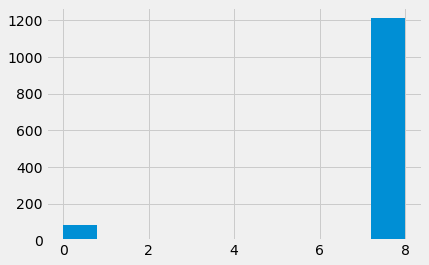

In [17]:
# Verificando quantidade de eventos em cada aba do navegador
df_raw['Tab id'].hist()

In [22]:
# Gerando o grafo
G = nx.DiGraph() ;
prev_node = 'start'

maxweight = 0
for i, e in df_raw.iterrows():
  # Utilizando apenas eventos disparados em elementos com id definido
  if( e['Element Id'] != '-'):
    #node = e['Event'] + '@' + e['Element Id']
    node = e['Event'] + '@' + e['X Path']
    G.add_node( prev_node, color = 'lightgreen', style = 'filled' )
    G.add_node( node, color = 'lightblue', style = 'filled' )
  
    # Aresta já existe
    if( G.has_edge( prev_node, node ) ):
      w = G [ prev_node ][ node ][ 'weight' ]
      w += 1
      G[ prev_node ][ node ][ 'weight' ] = w
      G[ prev_node ][ node ][ 'penwidth' ] = str(w)
      if w > maxweight: maxweight = w
    else:
      G.add_edge( prev_node, node, weight = 1, alpha = 0.5 )

    # Guardando referência para criar a próxima aresta
    prev_node = node

# Adicionando o último nó da cadeia de eventos
G.add_node( 'end', color = 'lightblue', style = 'filled' )
G.add_edge( prev_node, 'end', weight = 1, alpha = 0.5 )  

maxwidth = 10
for e in G.edges:
    pw = G[e[0]][e[1]]['weight']/maxweight * maxwidth
    G[e[0]][e[1]]['penwidth'] = max(1,pw)

In [23]:
# Informações sobre o grafo
print( nx.info( G ) )
print("Peso máximo:", maxweight)

Name: 
Type: DiGraph
Number of nodes: 37
Number of edges: 46
Average in degree:   1.2432
Average out degree:   1.2432
Peso máximo: 28


In [24]:
# Visualizing the graph using graphviz 
plt.figure( figsize = ( 32, 32 ) )
A = nx.nx_agraph.to_agraph( G )
A.layout() # prog = 'dot' )
file_name = datetime.today().strftime('%Y%m%d-%H%M') + '-graph.png'
A.draw( file_name , args = '-Gnodesep=0.01 -Gfont_size=1', prog = 'dot' ) 

<Figure size 2304x2304 with 0 Axes>

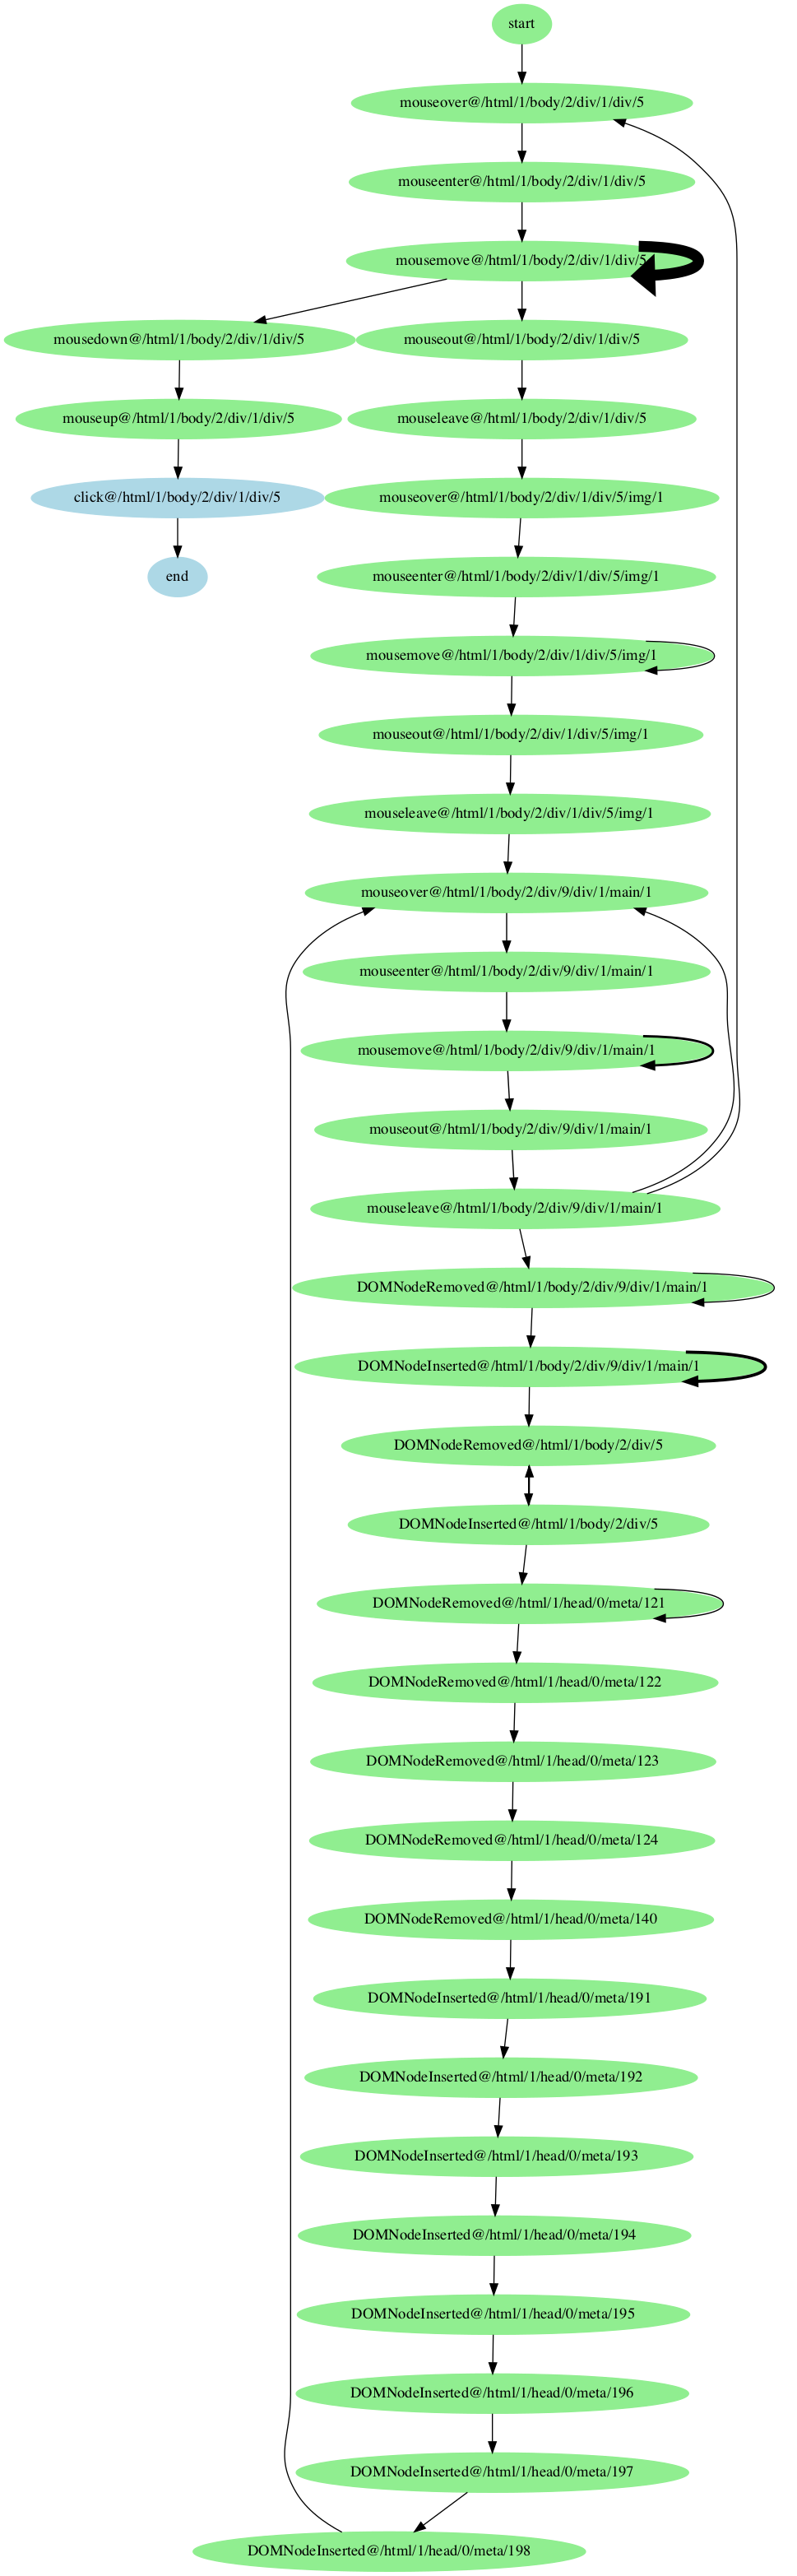

In [25]:
# Visualizando a imagem 
Image( file_name )